In [1]:
!pip install tensorflow

In [116]:
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

current_directory = os.getcwd()
print("Çalışma Dizini:", current_directory)

Çalışma Dizini: C:\Users\stajyer2\Downloads


In [117]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

from PIL import Image


import os

NUM_CLASSES = 6
dataset_dir = os.path.expanduser(r"C:\Users\stajyer2\Desktop\claw_data")




data = []
labels = []

for class_idx, class_name in enumerate(os.listdir(dataset_dir)):
    class_dir = os.path.join(dataset_dir, class_name)
    print(class_dir)

    if os.path.isdir(class_dir):

        for img_filename in os.listdir(class_dir):
            if (img_filename != "desktop.ini"):

                img_path = os.path.join(class_dir, img_filename)
                img = Image.open(img_path).resize((IMG_WIDTH, IMG_HEIGHT))
                img_array = np.array(img)
                data.append(img_array)
                labels.append(class_idx)

# Verileri Numpy dizilerine çevir
data = np.array(data)
labels = np.array(labels)

"""# Etiketleri kategorik hale getir (örneğin, sınıflandırma işlemi için)
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=NUM_CLASSES)"""



C:\Users\stajyer2\Desktop\claw_data\CLAW_A
C:\Users\stajyer2\Desktop\claw_data\CLAW_A_PLUS
C:\Users\stajyer2\Desktop\claw_data\CLAW_B
C:\Users\stajyer2\Desktop\claw_data\CLAW_B_PLUS
C:\Users\stajyer2\Desktop\claw_data\CLAW_C
C:\Users\stajyer2\Desktop\claw_data\Multi


'# Etiketleri kategorik hale getir (örneğin, sınıflandırma işlemi için)\nfrom tensorflow.keras.utils import to_categorical\nlabels = to_categorical(labels, num_classes=NUM_CLASSES)'

In [118]:
!pip install split-folders

import splitfolders

splitfolders.ratio(r"C:\Users\stajyer2\Desktop\claw_data", output="output", seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 1344 files [00:01, 928.15 files/s]


In [119]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

import os

train_dir = "./output/train"
os.makedirs(train_dir, exist_ok=True)



train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_dir = "./output/test"
os.makedirs(test_dir, exist_ok=True)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

validation_dir = "./output/validation"
os.makedirs(validation_dir, exist_ok=True)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 934 files belonging to 6 classes.
Found 207 files belonging to 6 classes.
Found 199 files belonging to 6 classes.


In [120]:
class_names = train_ds.class_names
print(class_names)
train_ds

['CLAW_A', 'CLAW_A_PLUS', 'CLAW_B', 'CLAW_B_PLUS', 'CLAW_C', 'Multi']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

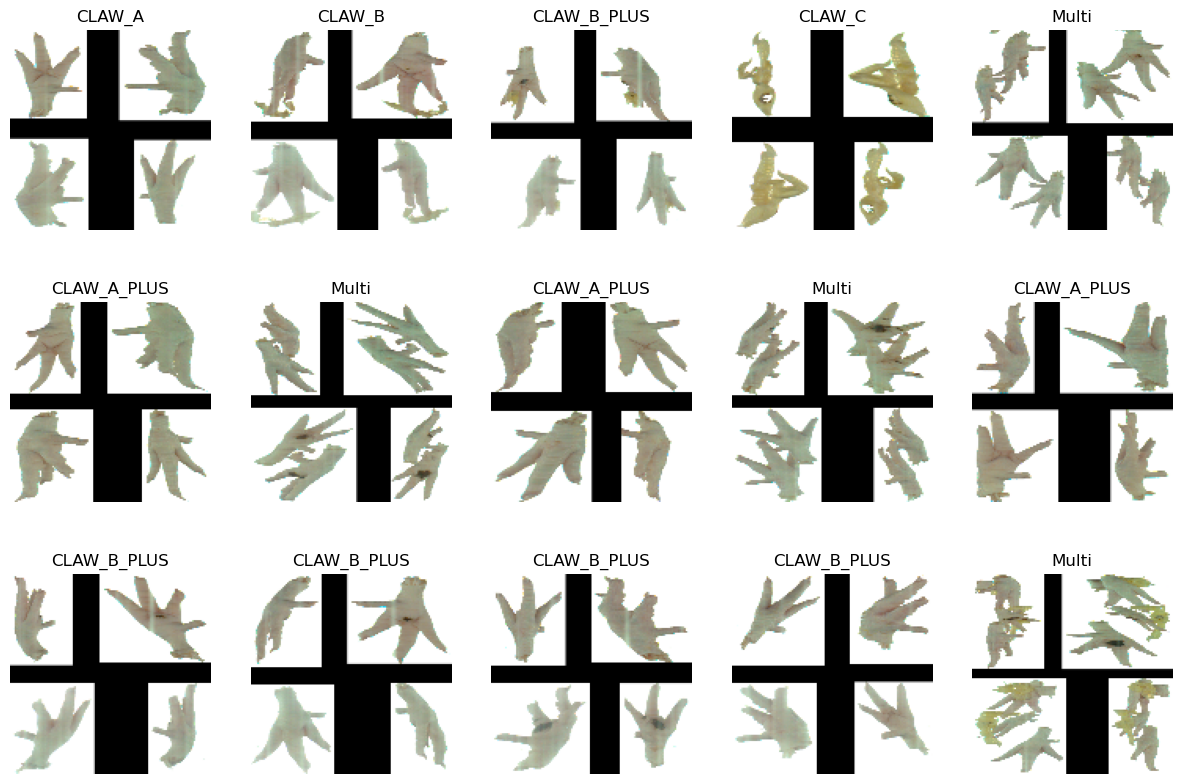

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # 3x5 alt grafik düzeni için
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)  # 3x5 alt grafik düzeni
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()  # Tüm alt grafikleri görüntüle


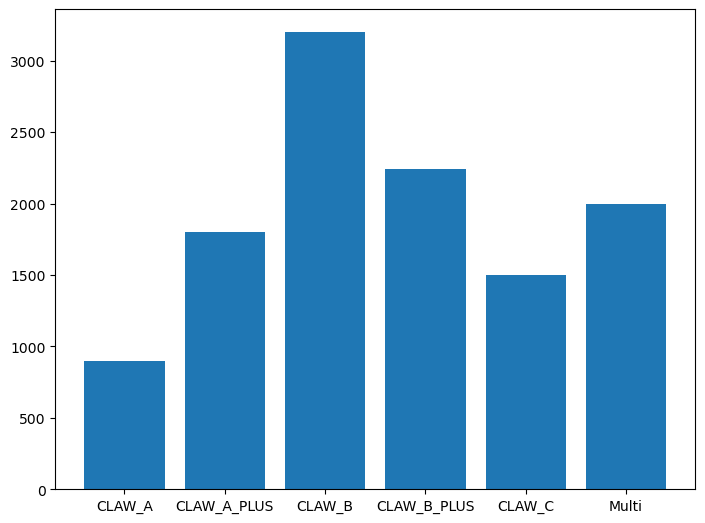

In [122]:
class_names = ["CLAW_A", "CLAW_A_PLUS", "CLAW_B", "CLAW_B_PLUS", "CLAW_C", "Multi"]
size = [896, 1800, 3200, 2240, 1500,2000]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(class_names, size)
plt.show()

In [123]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(13,"softmax"))

In [124]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [125]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)       

In [126]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=20, batch_size=64, verbose=1)

Epoch 1/20
15/15 [==============================] - 8s 465ms/step - loss: 4.5012 - accuracy: 0.1745 - val_loss: 2.0952 - val_accuracy: 0.1658
Epoch 2/20
15/15 [==============================] - 8s 507ms/step - loss: 1.8685 - accuracy: 0.2195 - val_loss: 1.9794 - val_accuracy: 0.2965
Epoch 3/20
15/15 [==============================] - 9s 550ms/step - loss: 1.6143 - accuracy: 0.3887 - val_loss: 1.5752 - val_accuracy: 0.5528
Epoch 4/20
15/15 [==============================] - 8s 510ms/step - loss: 1.3503 - accuracy: 0.5011 - val_loss: 1.2271 - val_accuracy: 0.5879
Epoch 5/20
15/15 [==============================] - 8s 506ms/step - loss: 1.1100 - accuracy: 0.5803 - val_loss: 1.1550 - val_accuracy: 0.6080
Epoch 6/20
15/15 [==============================] - 8s 502ms/step - loss: 0.9566 - accuracy: 0.6328 - val_loss: 0.9913 - val_accuracy: 0.5879
Epoch 7/20
15/15 [==============================] - 8s 506ms/step - loss: 0.8796 - accuracy: 0.6563 - val_loss: 0.8619 - val_accuracy: 0.6533
Epoch 

In [127]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

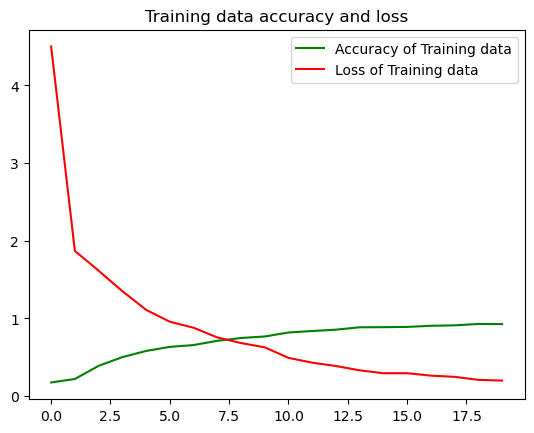

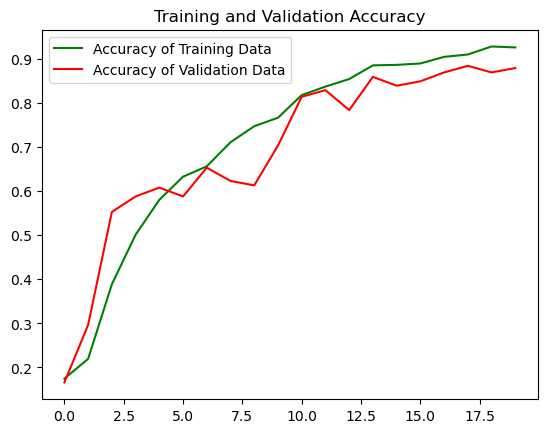

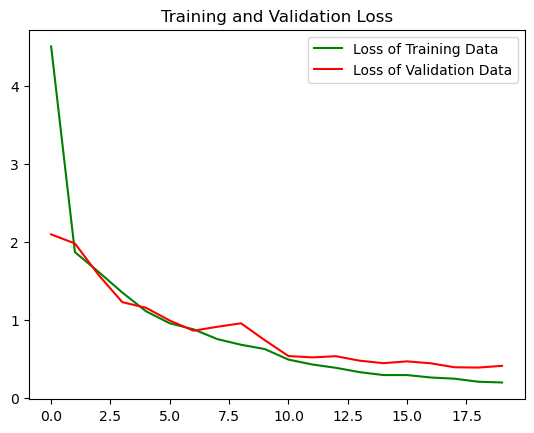

<Figure size 640x480 with 0 Axes>

In [128]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [129]:
loss, accuracy = model.evaluate(test_ds)

4/4 [==============================] - 1s 64ms/step - loss: 0.4051 - accuracy: 0.8406


1/1 [==============================] - 0s 24ms/step


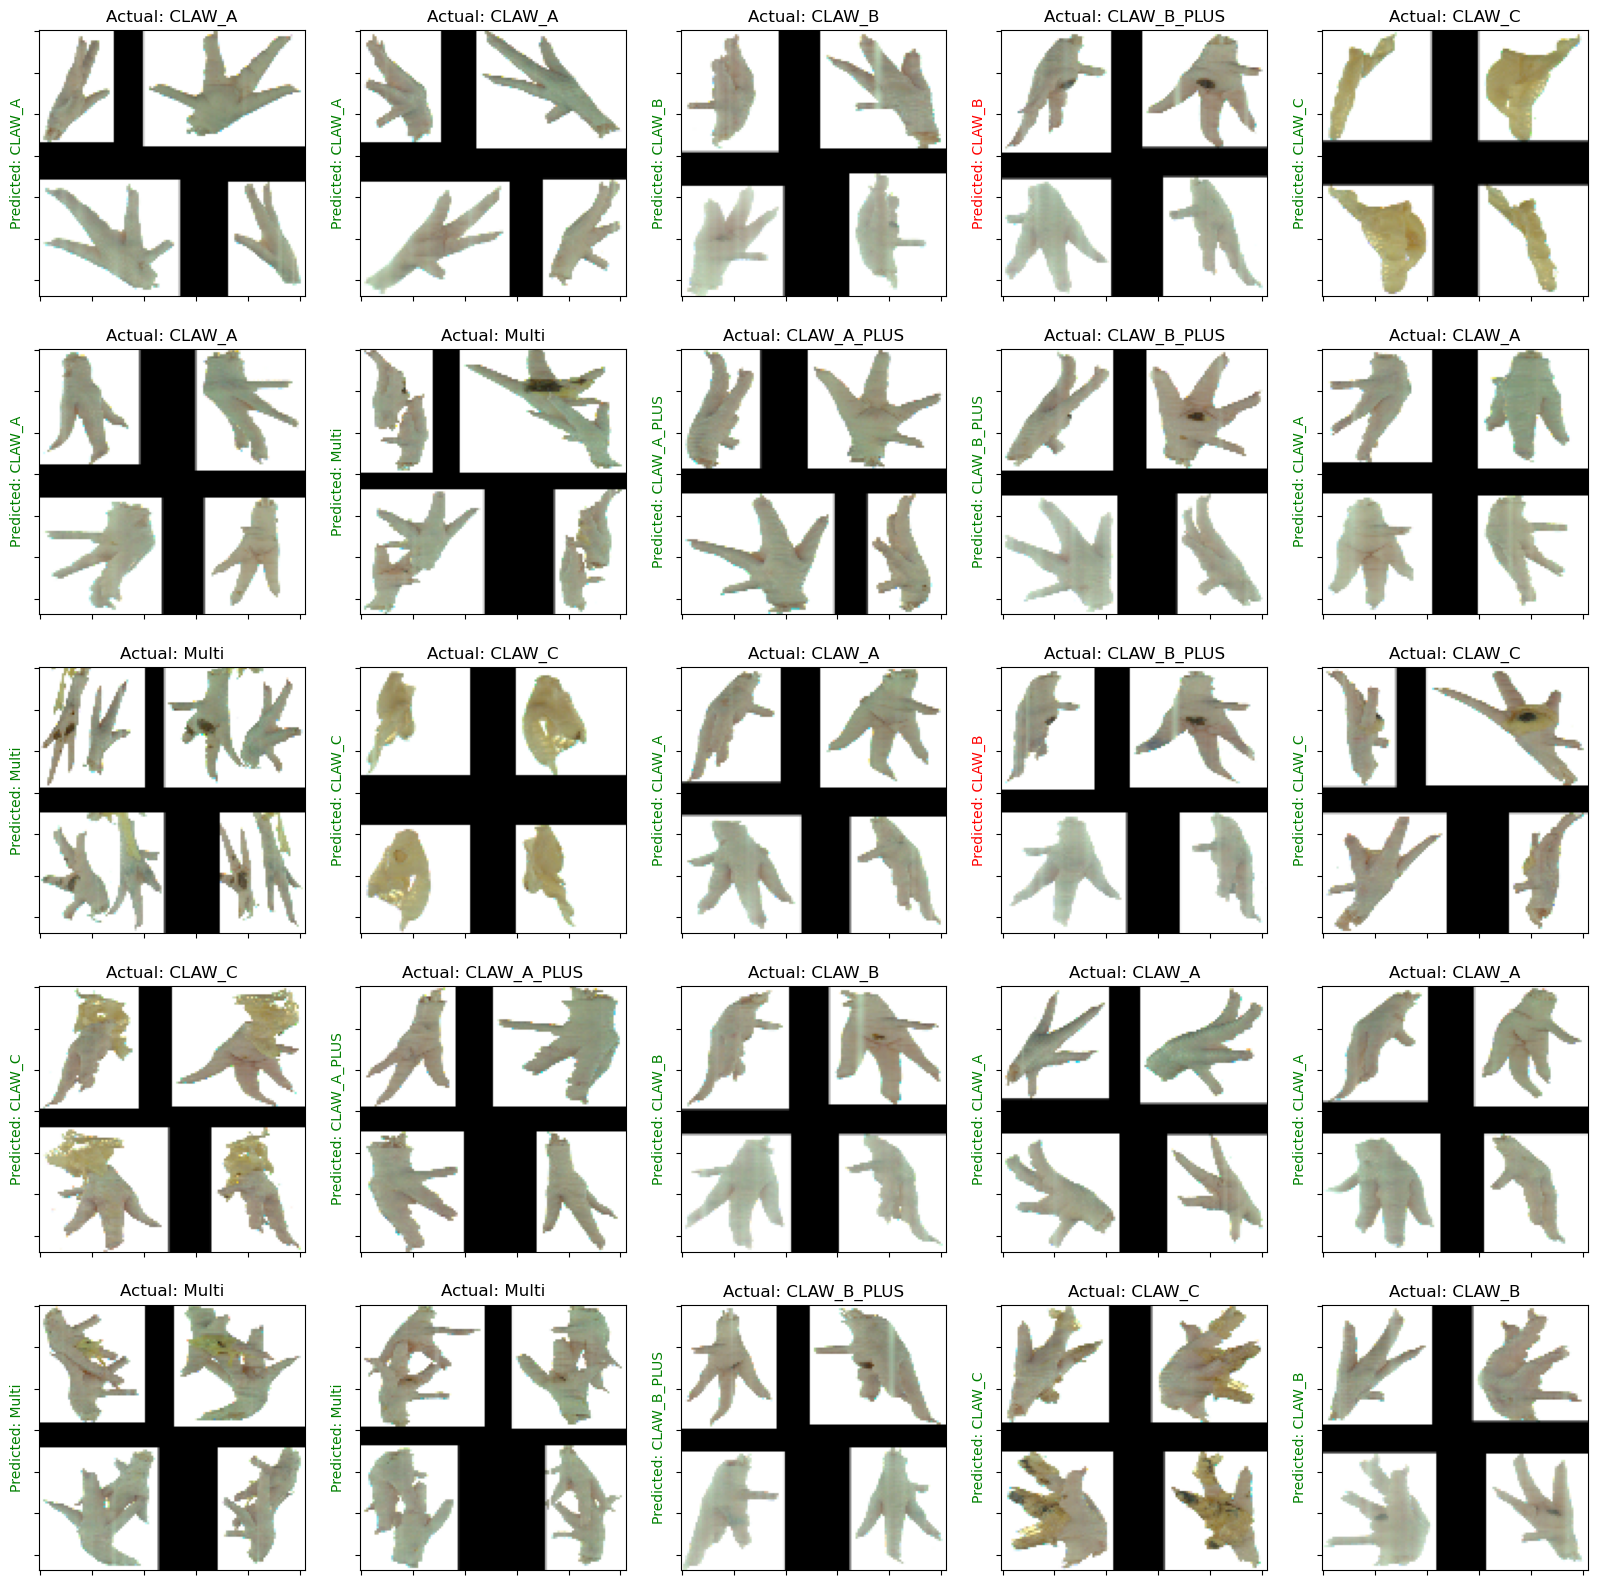

In [131]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])